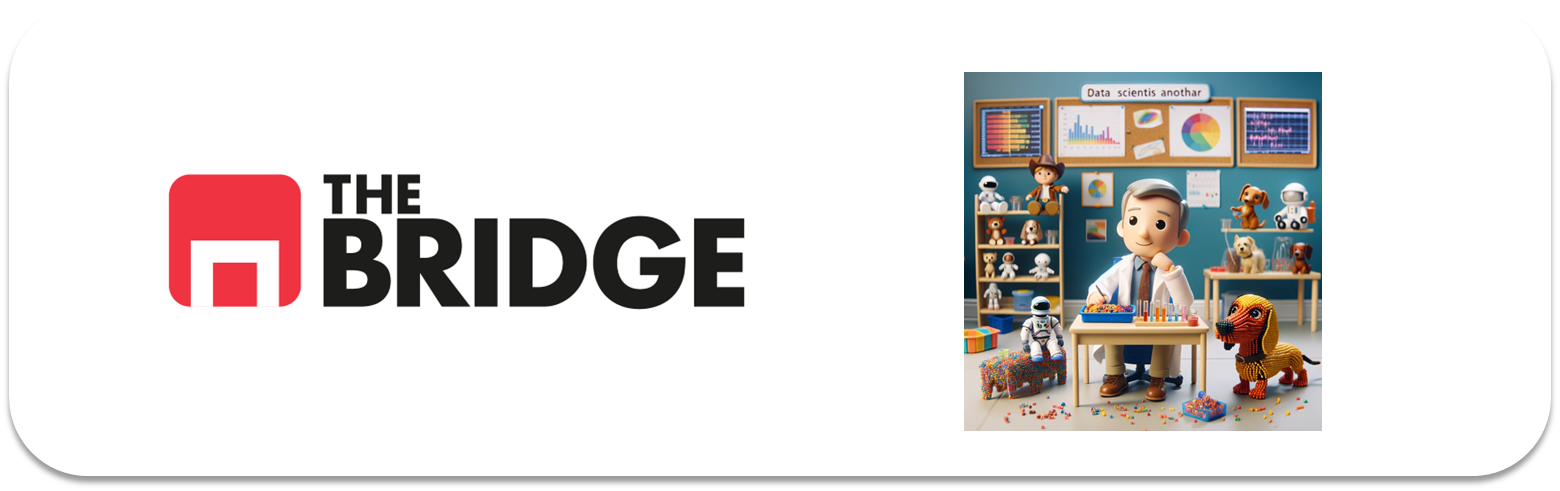

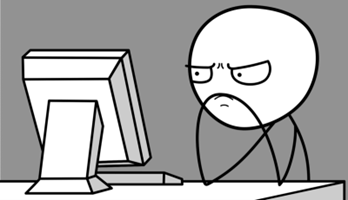

Para ejercitarte y afianzar lo aprendido sobre tendencias centrales, frecuencias, medidas de posición y rangos, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicio 1

Carga en un dataframe los datos contenidos en la ruta "./data/admission_data.csv", muestra un parte de su contenido y la info general del mismo

In [2]:
DF_admissions = pd.read_csv("./data/admission_data.csv")

### Ejercicio 2

Como ya sabes este dataset queremos analizarlo para poder estudiar la posible discriminación en las admisiones de los departamentos universitarios. Analiza la variable `Year`, ¿qué crees que deberíamos hacer con esta variable?

In [3]:
DF_admissions.Year.value_counts()

Year
1973    12763
Name: count, dtype: int64

IGNORE IT?

### Ejercicio 3

Analiza ahora la columna `Major`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. Puedes emplear las funciones del notebook de visualizaciones del repo o bien la función `pinta_distribucion_categoricas` del módulo `bootcampviztools` y que hemos usado en el workout. (Tiene un argumento `relativa` para mostrar las frecuencias relativas y otro `mostrar_valores` para enseñar las etiquetas de los valores).

In [4]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: (x / total)*100)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [5]:
DF_admissions.Major.value_counts()

Major
Other                                                      7924
Department of Physics and Astronomy                        1246
School of Medicine                                          918
Department of Mechanical Engineering                        792
Department of Psychology                                    714
Department of Economics                                     585
School of Political Science and International Relations     584
Name: count, dtype: int64

In [6]:
DF_admissions.Major.value_counts()/len(DF_admissions)*100

Major
Other                                                      62.085717
Department of Physics and Astronomy                         9.762595
School of Medicine                                          7.192666
Department of Mechanical Engineering                        6.205438
Department of Psychology                                    5.594296
Department of Economics                                     4.583562
School of Political Science and International Relations     4.575727
Name: count, dtype: float64

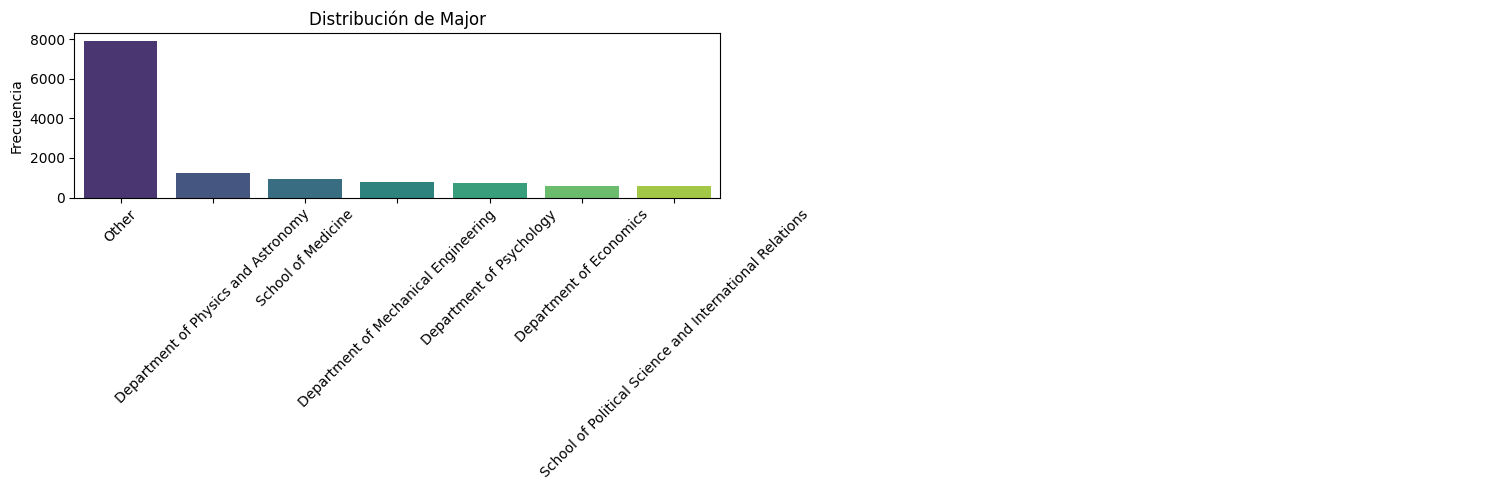

In [7]:
pinta_distribucion_categoricas(DF_admissions, ['Major'])

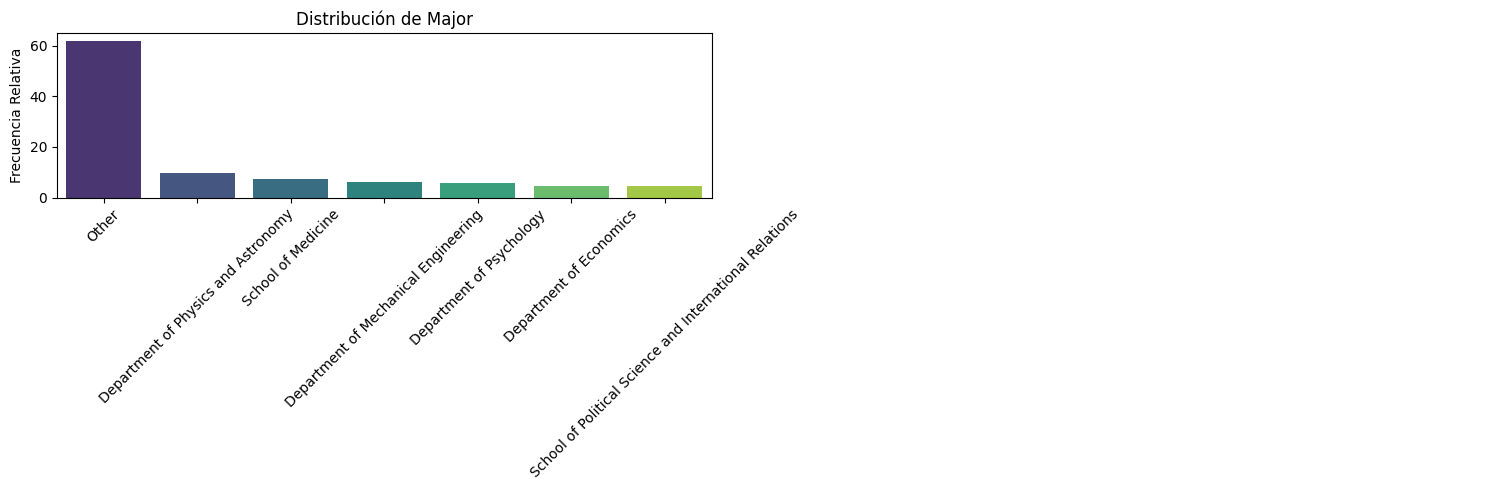

In [8]:
pinta_distribucion_categoricas(DF_admissions, ['Major'], relativa=True)

### Ejercicio 4

¿Qué puedes comentar de los datos anteriores?

* majority (62%) of applications went to schools in the 'other' category
* Department of Physics and Astronomy had the largest percentage of applications of the stated departments
* difficult to analyse for discrimination and draw meaningful conclusions due to 'other' category occupying such a large proportion of the data.

### Ejercicio 5

Analiza ahora la columna `Gender`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. 

In [9]:
def print_val_counts(df, cols, relativa=False):
    for variable in cols:
        print(f"para {variable}")
        if relativa:
            print(df[variable].value_counts()/len(df)*100)
        else:
            print(df[variable].value_counts())
        print('\n'*2)

In [10]:
def abs_rel_freqs(df, cols, relativa=False, mostrar_valores=False):
    print_val_counts(df, cols, relativa=relativa)
    pinta_distribucion_categoricas(df, cols, relativa=relativa, mostrar_valores=mostrar_valores)

para Gender
Gender
M    8442
F    4321
Name: count, dtype: int64





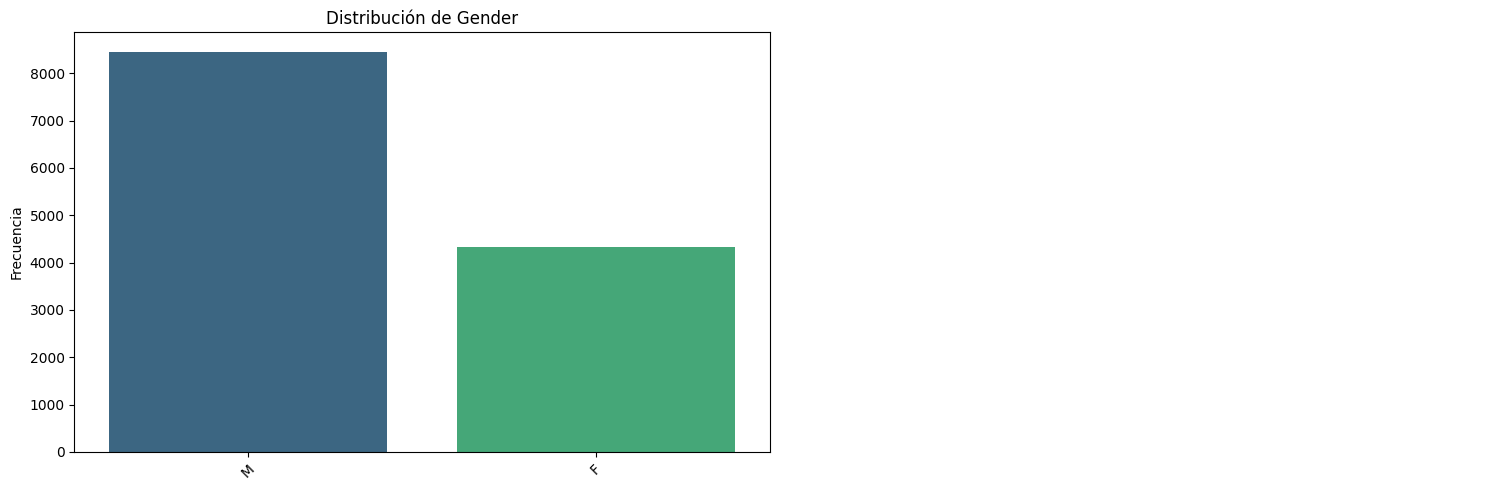

In [11]:
abs_rel_freqs(DF_admissions, ['Gender'])

para Gender
Gender
M    66.144323
F    33.855677
Name: count, dtype: float64





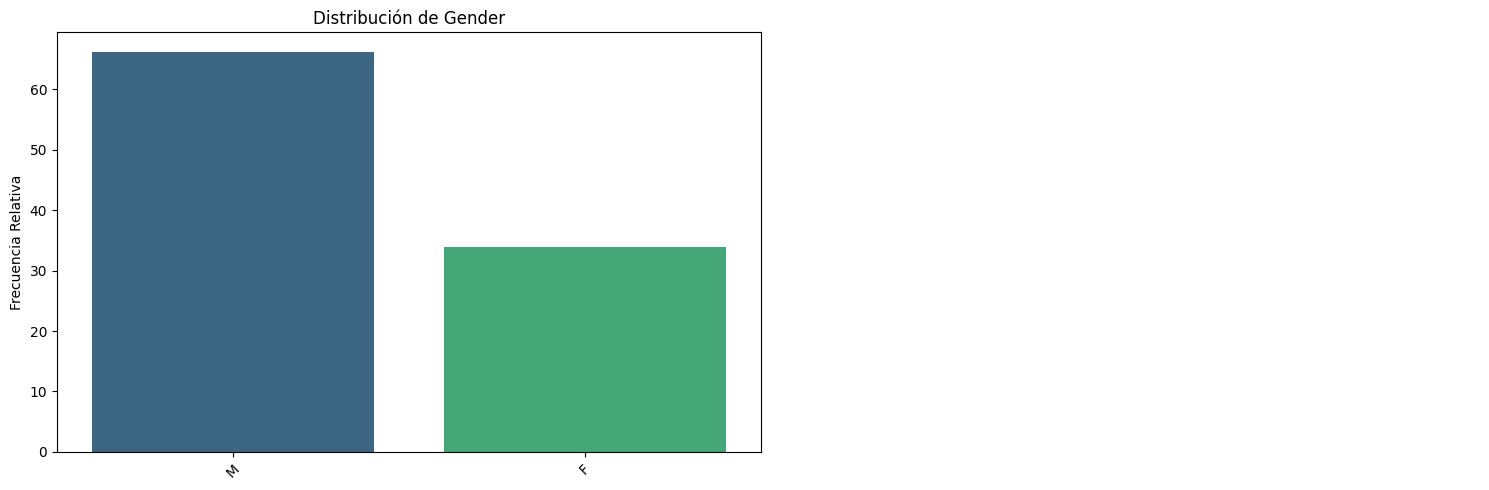

In [12]:
abs_rel_freqs(DF_admissions, ['Gender'], relativa=True)

### Ejercicio 6

¿Qué puedes comentar de los datos anteriores?

double the number of male applicants as female applicants

### Ejercicio 7

Finalmente analiza, la columna `Admission`, obtén las frecuencias absolutas y relativas de forma numérica y de forma gráfica. 

para Admission
Admission
Rejected    7531
Accepted    5232
Name: count, dtype: int64





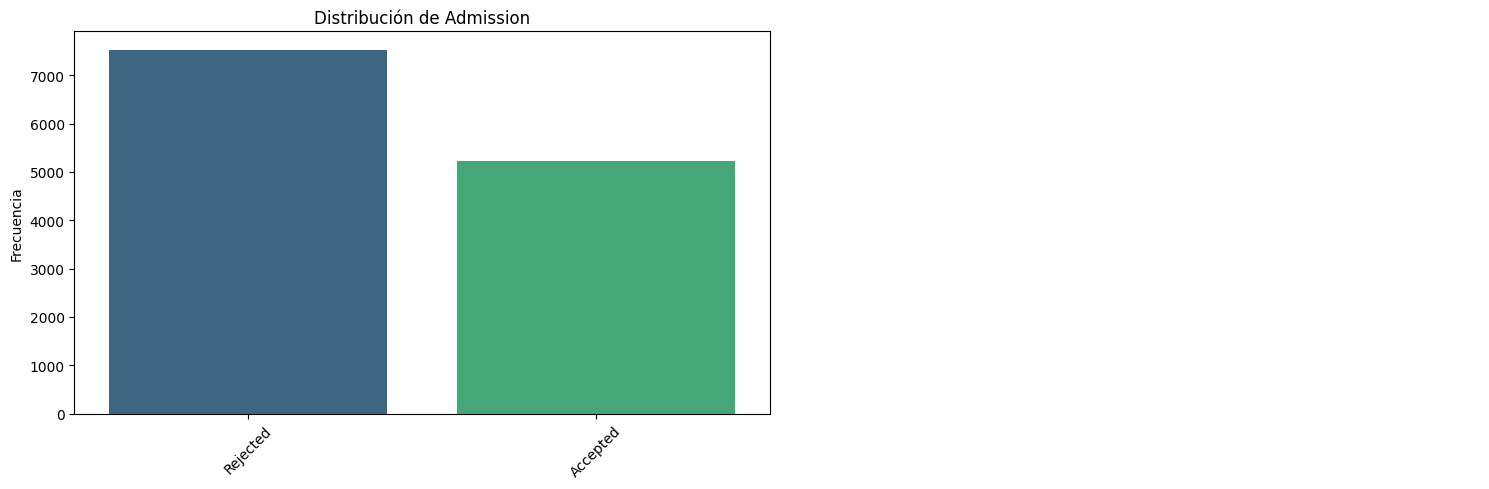

In [13]:
abs_rel_freqs(DF_admissions, ['Admission'])

para Admission
Admission
Rejected    59.006503
Accepted    40.993497
Name: count, dtype: float64





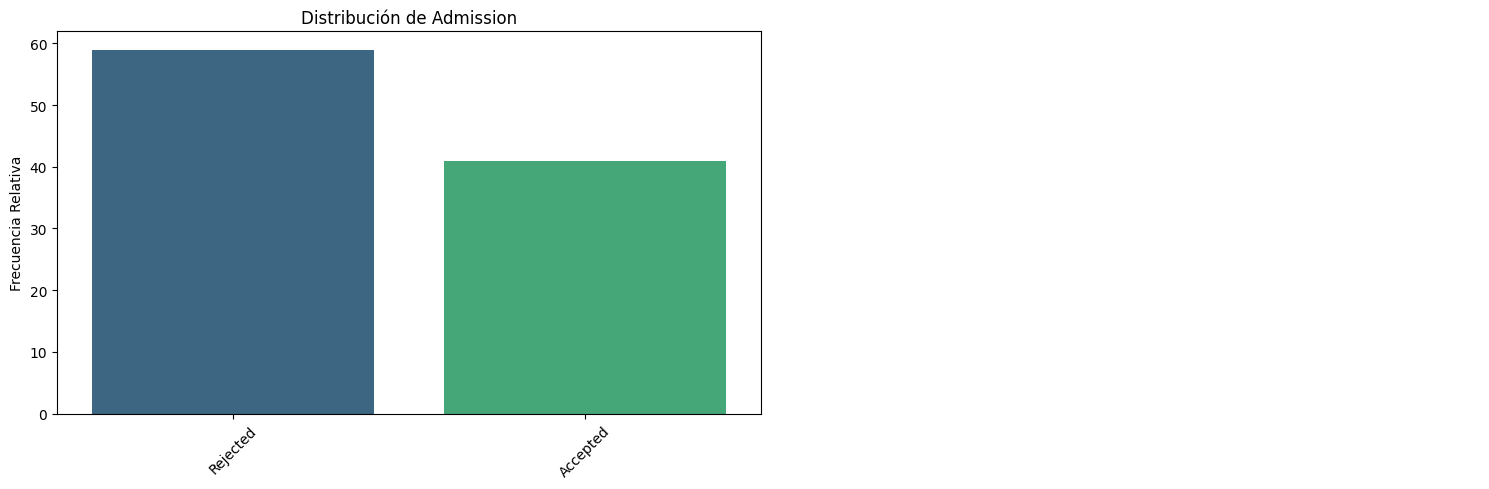

In [14]:
abs_rel_freqs(DF_admissions, ['Admission'], relativa=True)

### Ejercicio 8

¿Qué puedes comentar de los datos anteriores?

slightly higher number of rejected applications than accepted
receive more applications than there are places in schools


### Ejercicio 9

Carga en un dataframe los datos contenidos en la ruta "./data/tips.csv", muestra un parte de su contenido y la info general del mismo

In [15]:

DF_tips = pd.read_csv("./data/tips.csv")

In [16]:
DF_tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
DF_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


### Ejercicio 10

Vamos a analizar las medidas de tendencia central (media, mediana), las de posición (los cuartiles) y los rangos de las variables numéricas del dataset. Muestra esos valores para todas las variables numéricas del dataset.

In [18]:
tips_describe = pd.DataFrame(DF_tips.describe())

In [19]:
tips_describe.reset_index(names='measure', inplace=True)

In [20]:
tips_describe = tips_describe.T

In [21]:
headers = tips_describe.iloc[0]
tips_describe = tips_describe[1:]
tips_describe.columns = headers
tips_describe.loc[:,'IQR'] = tips_describe['75%'] - tips_describe['25%']
tips_describe.loc[:,'range'] = tips_describe['max'] - tips_describe['min']


In [22]:
tips_describe

measure,count,mean,std,min,25%,50%,75%,max,IQR,range
Unnamed: 0,244.0,121.5,70.580923,0.0,60.75,121.5,182.25,243.0,121.5,243.0
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81,10.78,47.74
tip,244.0,2.998279,1.383638,1.0,2.0,2.9,3.5625,10.0,1.5625,9.0
size,244.0,2.569672,0.9511,1.0,2.0,2.0,3.0,6.0,1.0,5.0


### Ejercicio 11

Para completar el análisis incial de las variables numéricas, muestra el diagrama de caja (*boxplot*) para cada una de las variables numéricas del dataset. ¿Qué puedes decir de ellas? (Puedes emplear las funciones incluidas en el notebook de visualizaciones sencillas o la función `plot_multiple_boxplots` de `bootcampviztools`, y que hemos empleado en el workout)

In [23]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [24]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [29]:
numeric_columns_tips = DF_tips.describe().T.index.to_list()
del numeric_columns_tips[0]

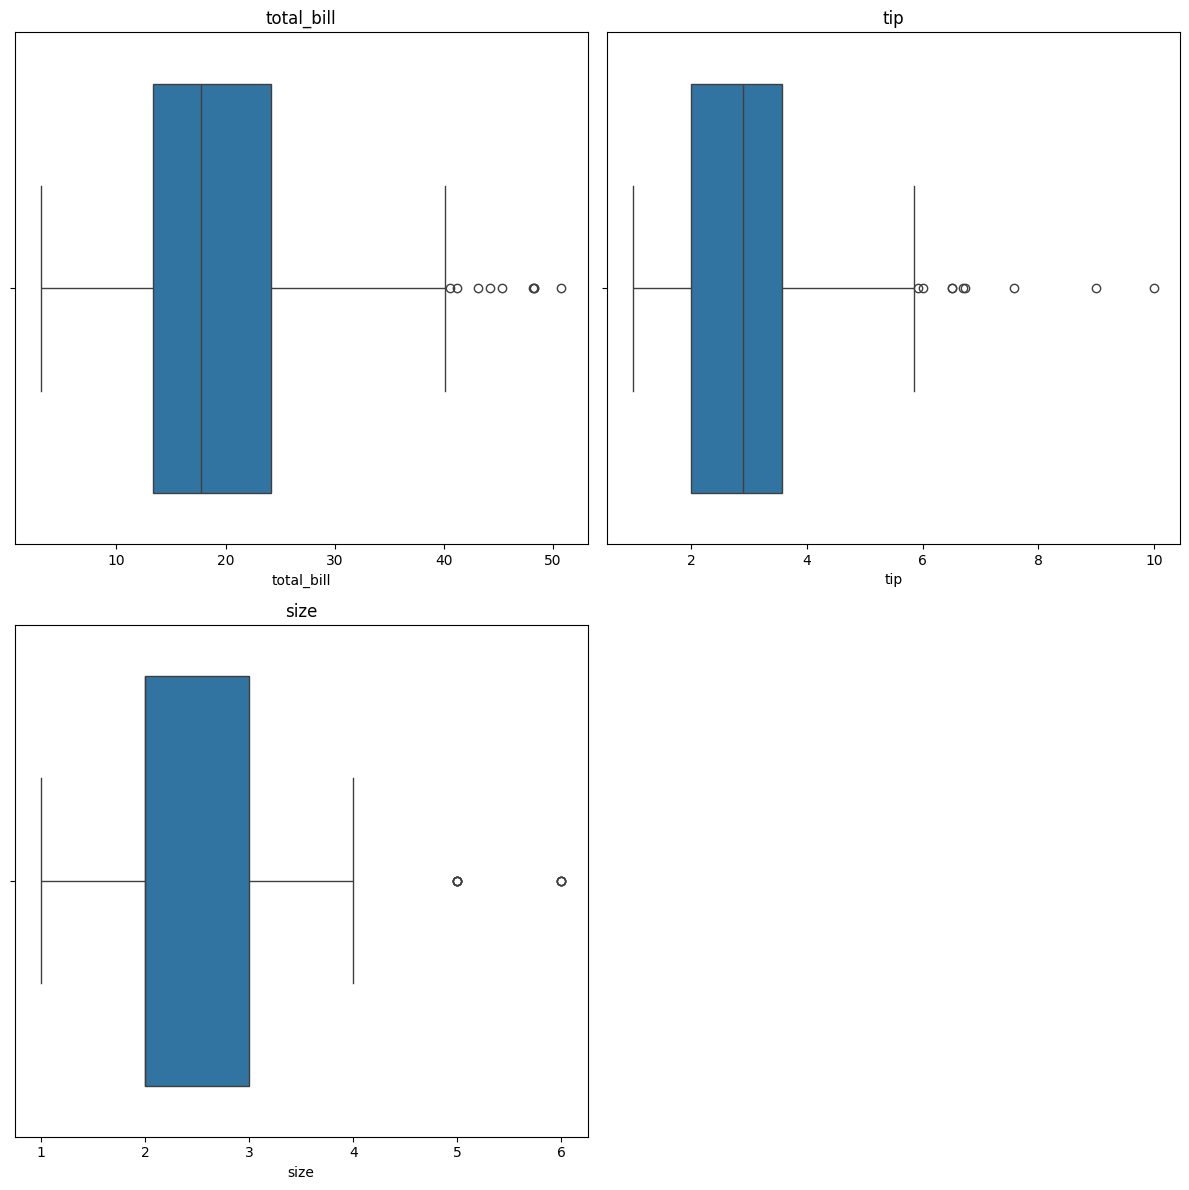

In [80]:
plot_multiple_boxplots(DF_tips, numeric_columns_tips)

### Ejercicio Extra #1:

Muestra las frecuencias absolutas y relativas de las variables categóricas del dataset. ¿Qué podrías destacar?

In [36]:
categoricas_tips = [col for col in DF_tips.columns if col not in numeric_columns_tips]

In [39]:
del categoricas_tips[0]

para sex
sex
Male      157
Female     87
Name: count, dtype: int64



para smoker
smoker
No     151
Yes     93
Name: count, dtype: int64



para day
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64



para time
time
Dinner    176
Lunch      68
Name: count, dtype: int64





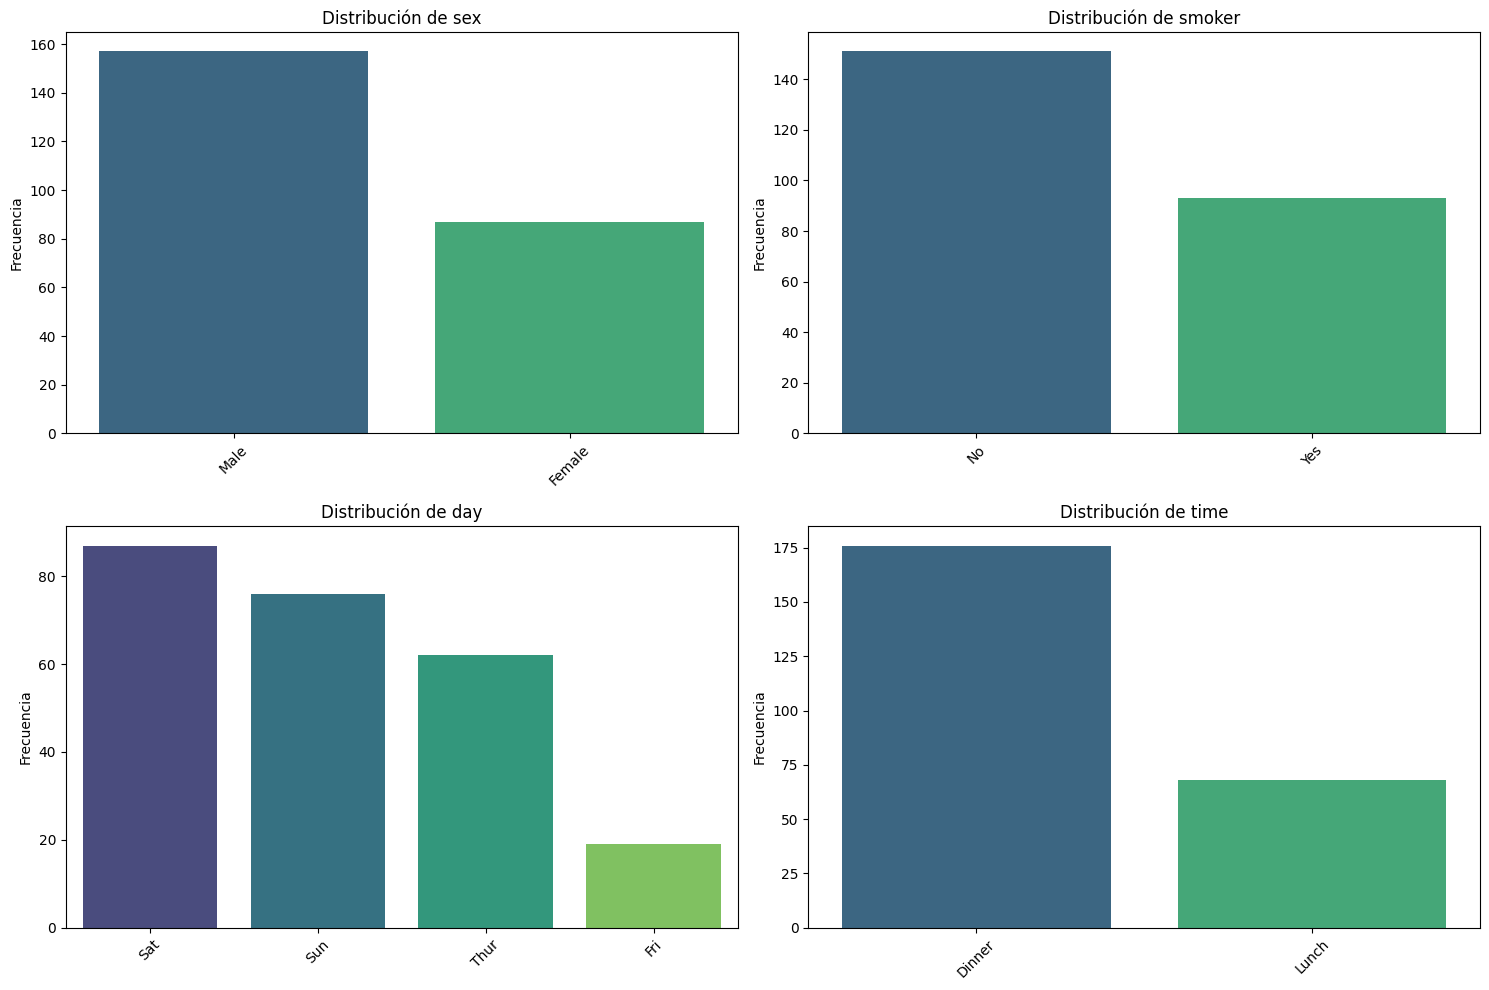

In [40]:
abs_rel_freqs(DF_tips, categoricas_tips)

para sex
sex
Male      64.344262
Female    35.655738
Name: count, dtype: float64



para smoker
smoker
No     61.885246
Yes    38.114754
Name: count, dtype: float64



para day
day
Sat     35.655738
Sun     31.147541
Thur    25.409836
Fri      7.786885
Name: count, dtype: float64



para time
time
Dinner    72.131148
Lunch     27.868852
Name: count, dtype: float64





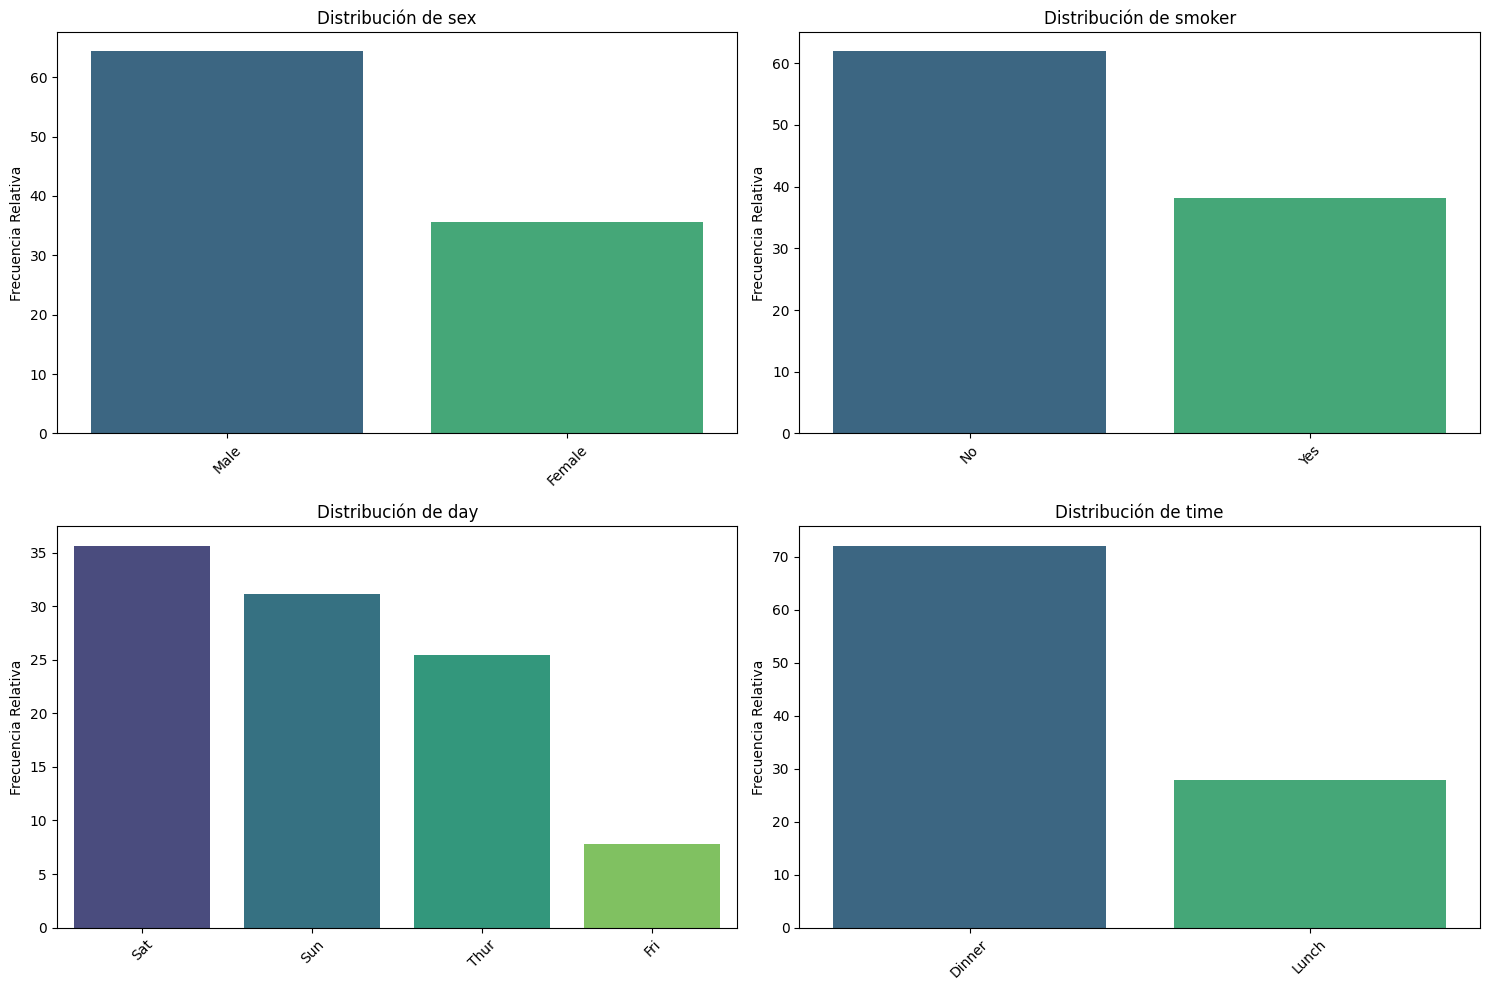

In [41]:
abs_rel_freqs(DF_tips, categoricas_tips, relativa=True)

### Ejercicio Extra #2:

Carga en un dataframe el dataset de los seguros que tanto conoces ya ("./data/Marketing-Customer-Analysis.csv") y analiza cual es el perfil típico del cliente de la compañía a partir de las variables categóricas siguientes: `education, state, employmentstatus, gender, marital_status, vehicle_class, vehicle_size`. (Nota: en el workout lo hicimos a partir de las modas de dichos valores, pero no es la forma "precisa" de hacerlo, piensa en la "moda" sí pero de la combinación de valores)


In [42]:
mca_df = pd.read_csv("./data/Marketing-Customer-Analysis.csv")

In [45]:
mca_cat_vars = ['education', 'state', 'employmentstatus', 'gender', 'marital_status', 'vehicle_class', 'vehicle_size']

In [51]:
mca_df[mca_cat_vars].mode().T

,0
education,Bachelor
state,California
employmentstatus,Employed
gender,F
marital_status,Married
vehicle_class,Four-Door Car
vehicle_size,Medsize


In [58]:
mca_described = mca_df.describe().T

In [60]:
mca_described.reset_index(names='measure', inplace=True)

In [64]:
mca_described.loc[:,'IQR'] = mca_described['75%'] - mca_described['25%']
mca_described.loc[:,'range'] = mca_described['max'] - mca_described['min']

In [66]:
mca_described = mca_described.round(2)

In [67]:
mca_described

,measure,count,mean,std,min,25%,50%,75%,max,IQR,range
0,customer_lifetime_value,9134.0,8004.94,6870.97,1898.01,3994.25,5780.18,8962.17,83325.38,4967.92,81427.37
1,income,9134.0,37657.38,30379.90,0.00,0.00,33889.50,62320.00,99981.00,62320.00,99981.00
2,monthly_premium_auto,9134.0,93.22,34.41,61.00,68.00,83.00,109.00,298.00,41.00,237.00
3,months_since_last_claim,9134.0,15.10,10.07,0.00,6.00,14.00,23.00,35.00,17.00,35.00
4,months_since_policy_inception,9134.0,48.06,27.91,0.00,24.00,48.00,71.00,99.00,47.00,99.00
5,number_of_open_complaints,9134.0,0.38,0.91,0.00,0.00,0.00,0.00,5.00,0.00,5.00
6,number_of_policies,9134.0,2.97,2.39,1.00,1.00,2.00,4.00,9.00,3.00,8.00
7,total_claim_amount,9134.0,434.09,290.50,0.10,272.26,383.95,547.51,2893.24,275.26,2893.14


In [77]:
mca_num_vars = mca_df.describe().T.index.tolist()

In [78]:
mca_num_vars

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

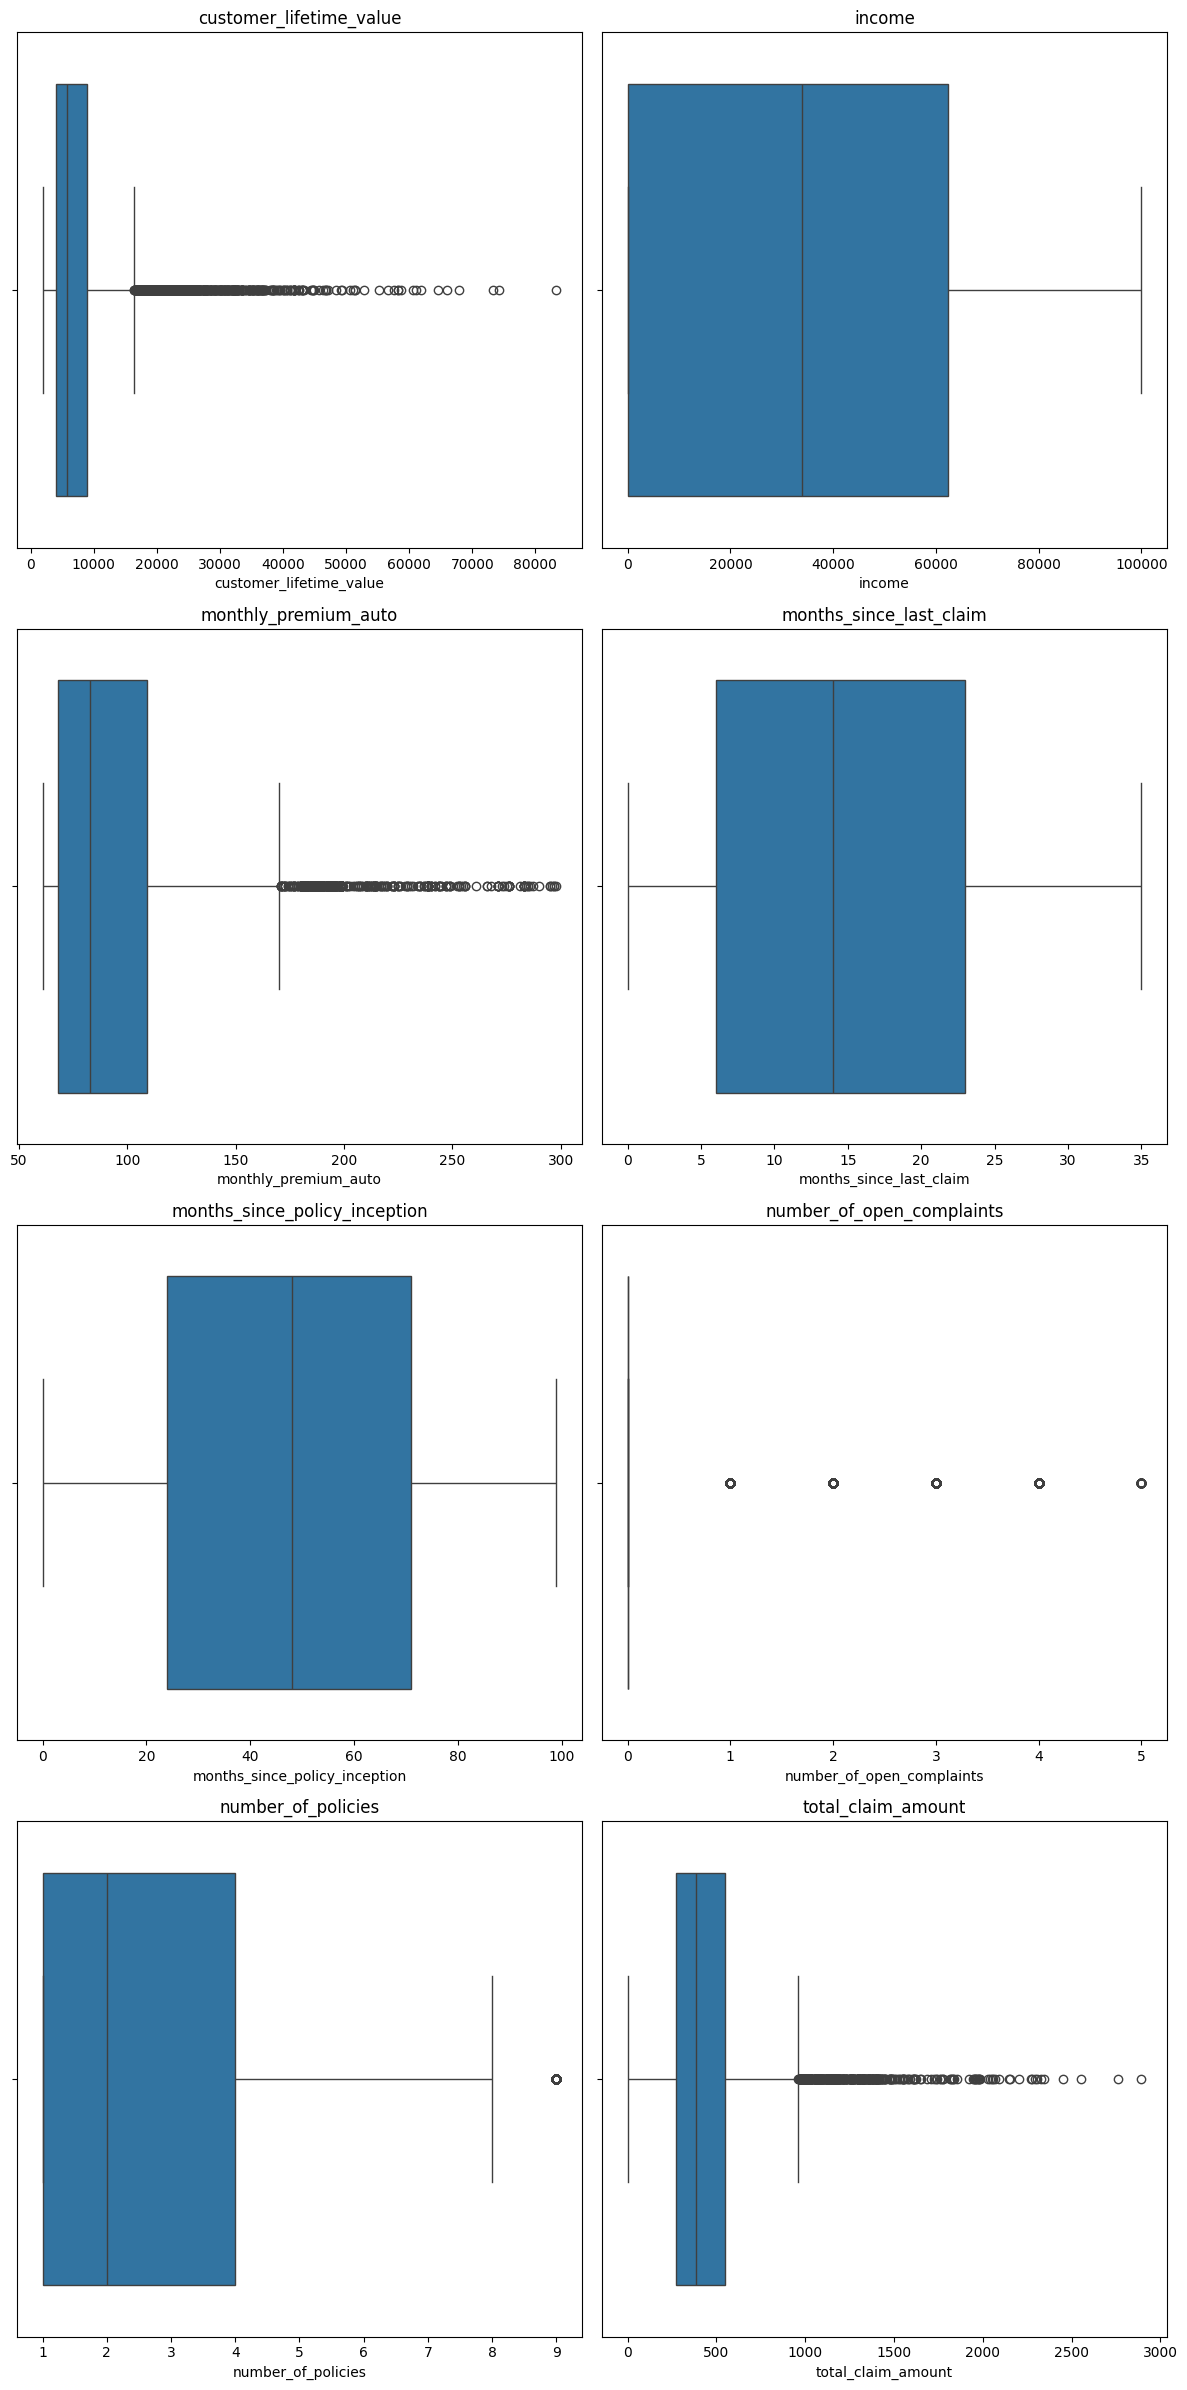

In [79]:
plot_multiple_boxplots(mca_df, mca_num_vars)